<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Association_Rules_for_Movies_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving my_movies.csv to my_movies.csv


In [2]:
import pandas as pd
df=pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [6]:
df.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
len(df)

10

In [8]:
trans = []
for i in range(0,10):
  trans.append([str(df.values[i,j]) for j in range(0, 15)])
trans


[['Sixth Sense',
  'LOTR1',
  'Harry Potter1',
  'Green Mile',
  'LOTR2',
  '1',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1'],
 ['Gladiator',
  'Patriot',
  'Braveheart',
  'nan',
  'nan',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0'],
 ['LOTR1',
  'LOTR2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Harry Potter1',
  'Harry Potter2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'nan',
  'nan',
  'nan',
  '0',
  

In [9]:
!pip install apyori
from apyori import apriori
rules=apriori(transactions = trans,
               min_support=0.003,
               min_confidence=0.2,
               min_lift=3,
               min_length=2,
               max_lemgth=2)
rules

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=26ee8725d06db3001d11cd383361628436f0307206700ce7f226c43b89983544
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


<generator object apriori at 0x78cc0d9a7df0>

In [10]:
report=list(rules)
report

[RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'Harry Potter2', 'Harry Potter1'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Harry Potter1'}), items_add=frozenset({'Harry Potter2'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'Harry Potter2'}), items_add=frozenset({'Harry Potter1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=

In [11]:
import pandas as pd
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.mode()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2,1,1,0,0,1,0,0,0,0,0


In [15]:
len(report)

112

In [16]:
report[0]

RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)])

In [17]:
report[0][1] #(support)

0.1

In [18]:
report[0][2][0][0]  #1st-(order Base item)

frozenset({'Green Mile'})

In [19]:
report[0][2][0][1]  #1st-(order Add item)

frozenset({'LOTR'})

In [20]:
report[0][2][0][2] #1st-(order Confidence item)

0.5

In [21]:
report[0][2][0][3] #1st-(order Lift item)

5.0

In [22]:
report[0][2][1][0] #2nd-(order Base item)

frozenset({'LOTR'})

In [23]:
report[0][2][1][1] #2nd-(order Add item)

frozenset({'Green Mile'})

In [24]:
report[0][2][1][2] #2nd-(order Confidence item)

1.0

In [25]:
report[0][2][1][3] #2nd-(order Lift item)

5.0

In [26]:
# Accessing through for loop
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]

for i in range(0,112):
    a.append(report[i][1]) # (support)
    b.append(report[i][2][0][0]) #1st (order Base item)
    c.append(report[i][2][0][1]) #1st (order Add item)
    d.append(report[i][2][0][2]) #1st (order Confidence item)
    e.append(report[i][2][0][3]) #1st (order Lift item)
    f.append(report[i][2][1][0]) #2st (order Base item)
    g.append(report[i][2][1][1]) #2st (order Add item)
    h.append(report[i][2][1][2]) #2st (order Confidence item)
    k.append(report[i][2][1][3]) #2st (order Lift item)


In [27]:
df["Support"]  = pd.DataFrame(a)
df["1st_Base_item"]  = pd.DataFrame(b)
df["1st_add_item"] = pd.Series(c)
df["1st_Confidence"]  = pd.DataFrame(d)
df["1st_Lift"]  = pd.DataFrame(e)
df["2st_order_Base_item"]  = pd.Series(f)
df["2st_order_Add_item"]  = pd.Series(g)
df["2st_order_Confidence"]  = pd.DataFrame(h)
df["2st_order_Lift"]  = pd.DataFrame(k)
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,...,Green Mile,Support,1st_Base_item,1st_add_item,1st_Confidence,1st_Lift,2st_order_Base_item,2st_order_Add_item,2st_order_Confidence,2st_order_Lift
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,...,1,0.1,Green Mile,(LOTR),0.5,5.0,(LOTR),(Green Mile),1.0,5.0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,...,0,0.1,Harry Potter1,(Harry Potter2),0.5,5.0,(Harry Potter2),(Harry Potter1),1.0,5.0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,...,0,0.2,LOTR1,(LOTR2),1.0,5.0,(LOTR2),(LOTR1),1.0,5.0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.1,Green Mile,"(0, LOTR)",0.5,5.0,(LOTR),"(0, Green Mile)",1.0,5.0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.1,Harry Potter1,"(0, Harry Potter2)",0.5,5.0,(Harry Potter2),"(0, Harry Potter1)",1.0,5.0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.2,LOTR1,"(0, LOTR2)",1.0,5.0,(LOTR2),"(0, LOTR1)",1.0,5.0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,...,0,0.1,Green Mile,"(LOTR, 1)",0.5,5.0,(LOTR),"(Green Mile, 1)",1.0,5.0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,...,0,0.1,Harry Potter1,"(Harry Potter2, 1)",0.5,5.0,(Harry Potter2),"(1, Harry Potter1)",1.0,5.0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.2,LOTR1,"(LOTR2, 1)",1.0,5.0,(LOTR2),"(LOTR1, 1)",1.0,5.0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,...,1,0.1,Green Mile,"(Gladiator, LOTR)",0.5,5.0,(LOTR),"(Gladiator, Green Mile)",1.0,10.0


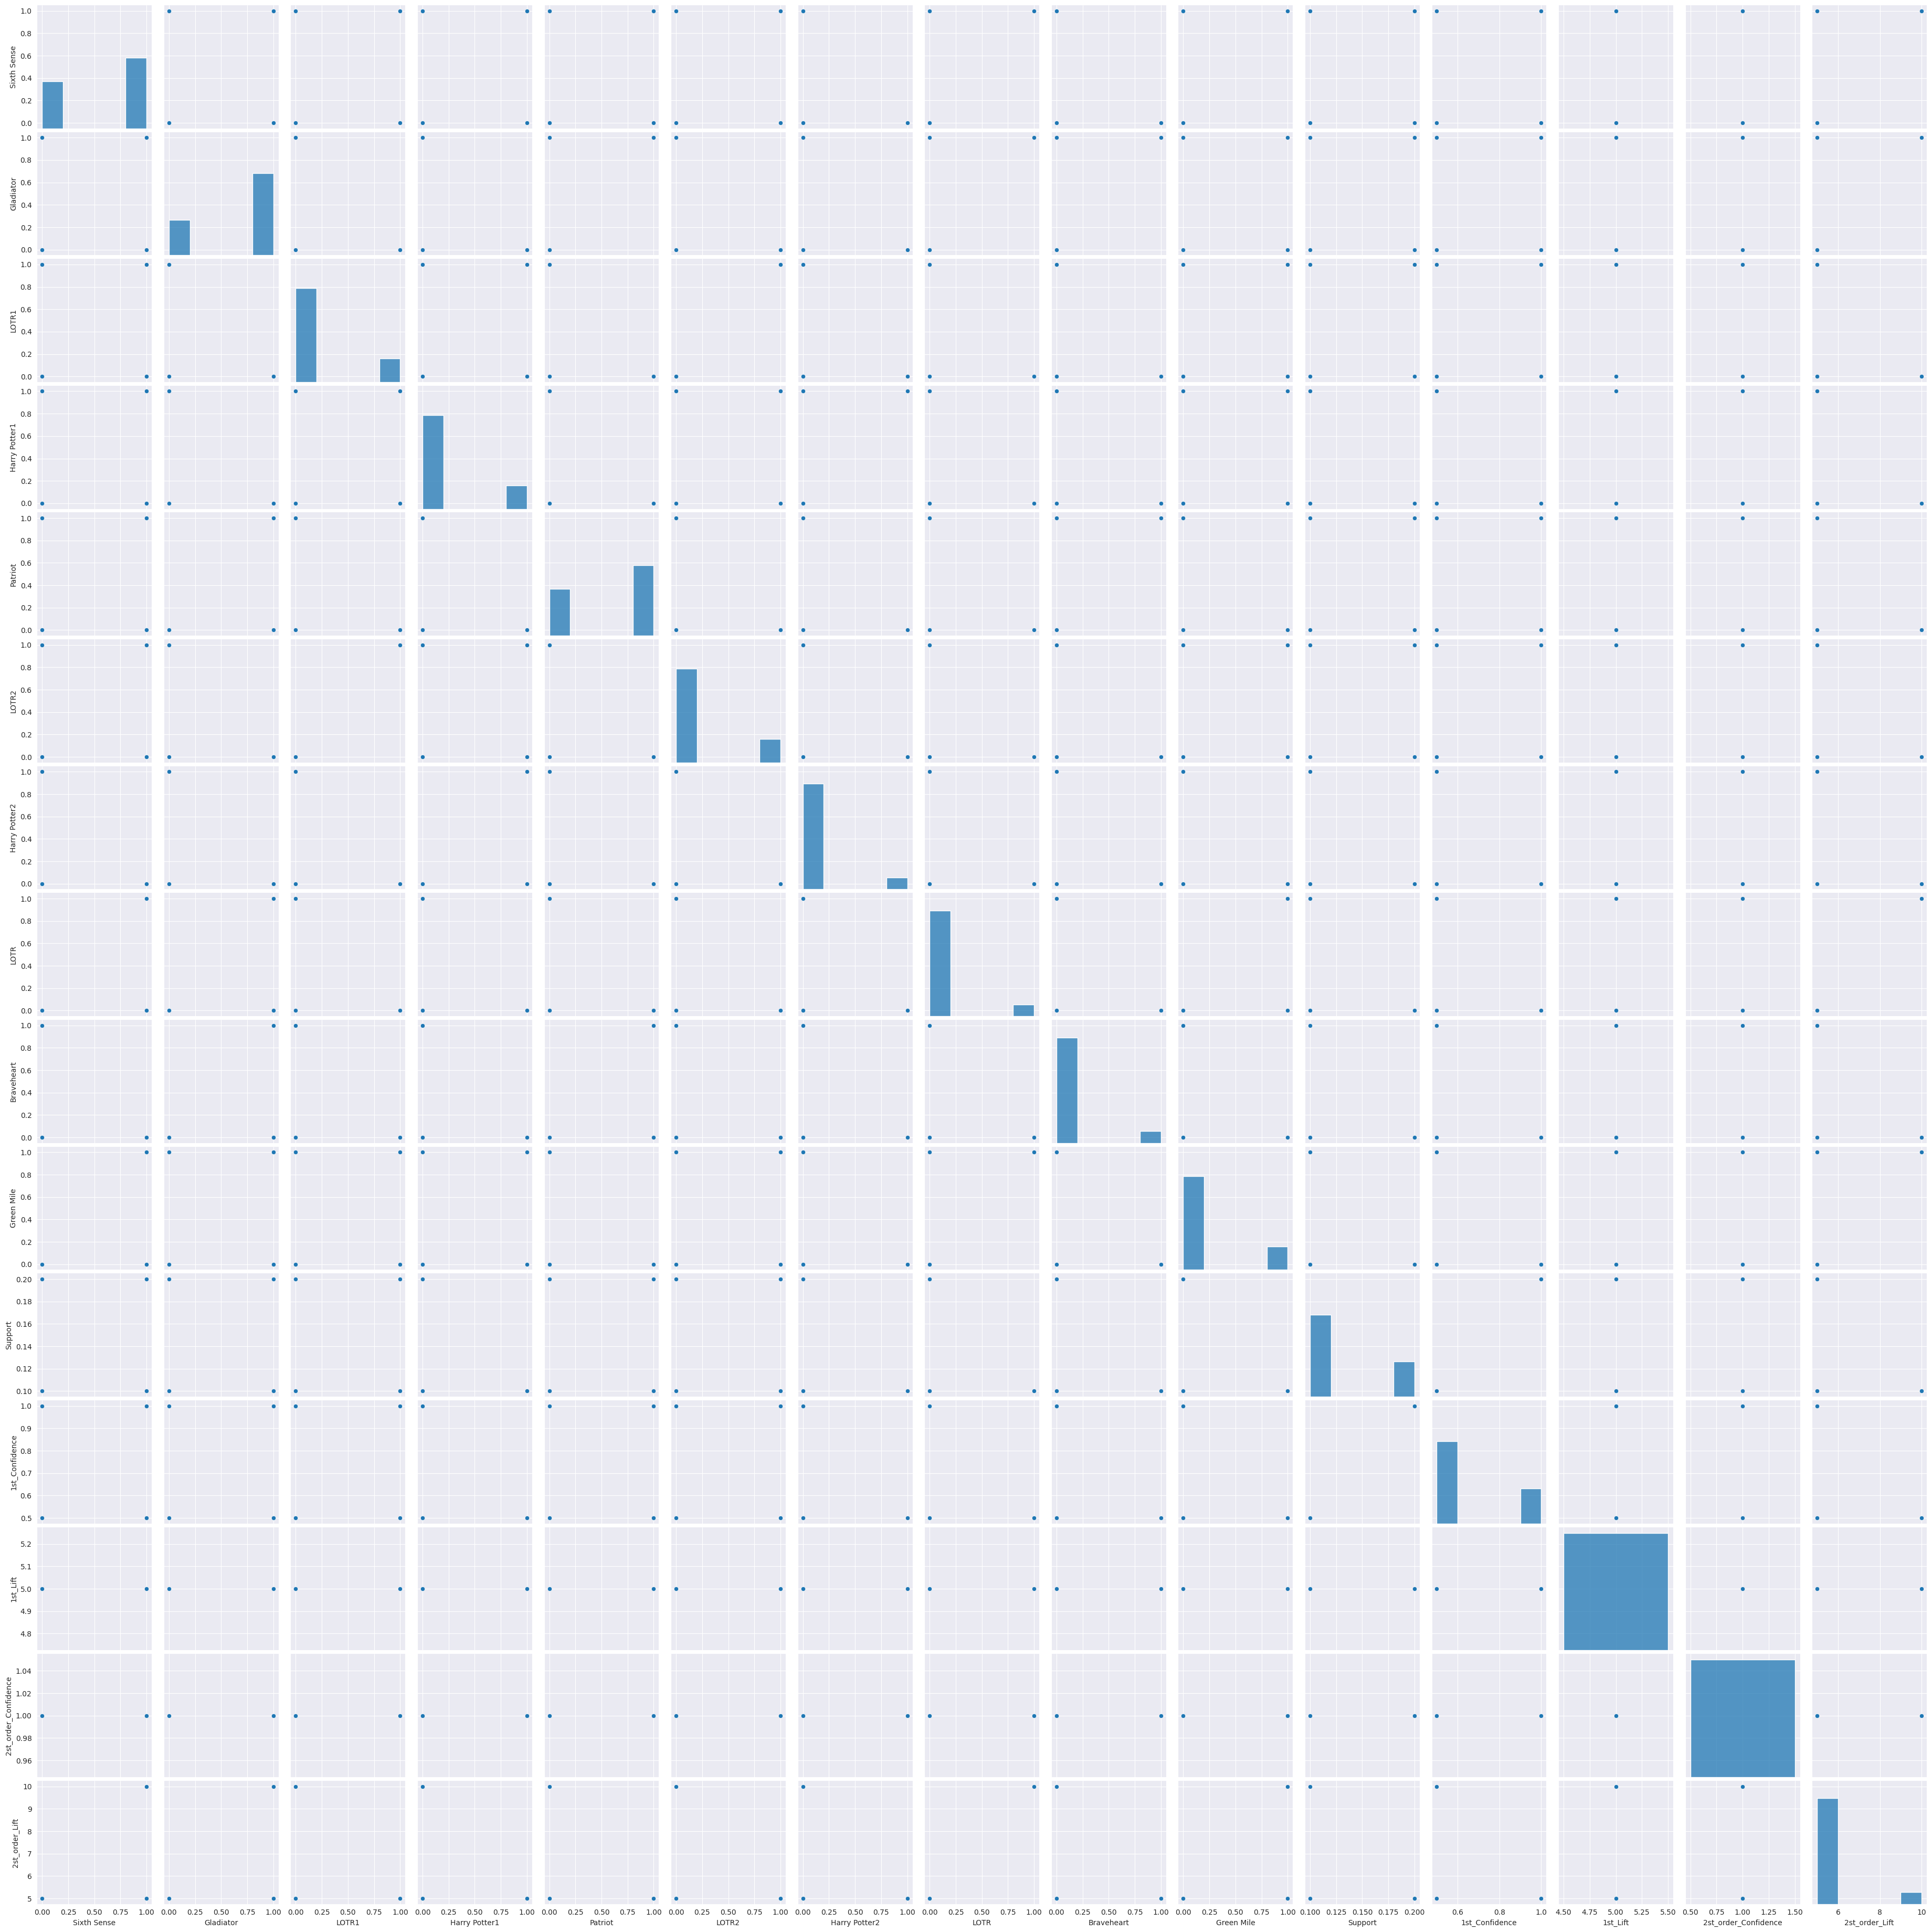

In [28]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

<ipython-input-49-4f03dd3c88e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data=df.corr()


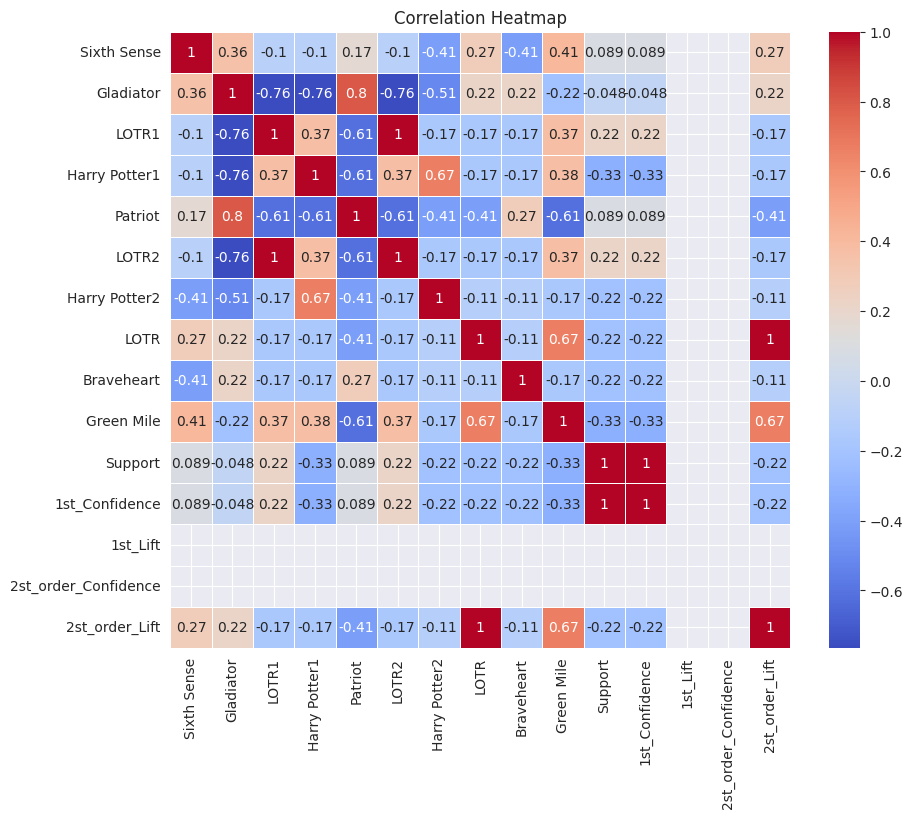

In [49]:
# Example 6: Heatmap
import matplotlib.pyplot as plt
correlation_matrix = data=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
Base_item = pd.DataFrame(a)
Add_item = pd.DataFrame(b)
support = pd.DataFrame(c)
confidence = pd.DataFrame(d)
lift = pd.DataFrame(e)

In [55]:
df_rules = pd.concat([Base_item,
                      Add_item,
                      support,
                      confidence,
                      lift],axis=1)

In [56]:
k1 = ["Base_item","Add_item","support","confidence","lift"]

array([[<Axes: title={'center': 'Sixth Sense'}>,
        <Axes: title={'center': 'Gladiator'}>,
        <Axes: title={'center': 'LOTR1'}>,
        <Axes: title={'center': 'Harry Potter1'}>],
       [<Axes: title={'center': 'Patriot'}>,
        <Axes: title={'center': 'LOTR2'}>,
        <Axes: title={'center': 'Harry Potter2'}>,
        <Axes: title={'center': 'LOTR'}>],
       [<Axes: title={'center': 'Braveheart'}>,
        <Axes: title={'center': 'Green Mile'}>,
        <Axes: title={'center': 'Support'}>,
        <Axes: title={'center': '1st_Confidence'}>],
       [<Axes: title={'center': '1st_Lift'}>,
        <Axes: title={'center': '2st_order_Confidence'}>,
        <Axes: title={'center': '2st_order_Lift'}>, <Axes: >]],
      dtype=object)

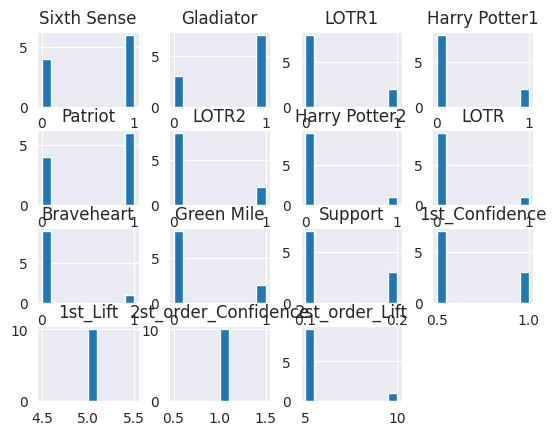

In [59]:
df.hist()

In [60]:
df.skew()

<ipython-input-60-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Sixth Sense            -0.484123
Gladiator              -1.035098
LOTR1                   1.778781
Harry Potter1           1.778781
Patriot                -0.484123
LOTR2                   1.778781
Harry Potter2           3.162278
LOTR                    3.162278
Braveheart              3.162278
Green Mile              1.778781
Support                 1.035098
1st_Confidence          1.035098
1st_Lift                0.000000
2st_order_Confidence    0.000000
2st_order_Lift          3.162278
dtype: float64